# Hierarchical Agglomerative Clustering

In [ ]:
# Problem Statement - 
'''You are the data scientist at a retail company, and the marketing 
team is looking to optimize their promotional campaigns by targeting 
specific customer segments. The goal is to identify distinct groups 
of customers based on their demographic information such as age, income, 
and spending score.'''
# Solution: Agglomerative Hierarchical Clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

In [16]:
# dataset creation
np.random.seed(42)
data = pd.DataFrame({'Age': np.random.randint(18,65,100),
                     'Income': np.random.randint(30000,100000,100),
                     'SpendingScore': np.random.randint(1,100,100)
                    })
print(data)

    Age  Income  SpendingScore
0    56   32695             59
1    46   78190             36
2    32   35258             19
3    60   69504             90
4    25   63159             67
..  ...     ...            ...
95   24   55184             97
96   26   72107             69
97   41   81663             61
98   18   45708             48
99   61   79811             19

[100 rows x 3 columns]


In [3]:
scaler = StandardScaler() # for standardization
scaled_data = scaler.fit_transform(data)

In [10]:

clustering = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
data['Cluster'] = clustering.fit_predict(scaled_data)
print(data['Cluster'])

0     0
1     0
2     1
3     0
4     2
     ..
95    2
96    2
97    0
98    2
99    0
Name: Cluster, Length: 100, dtype: int64


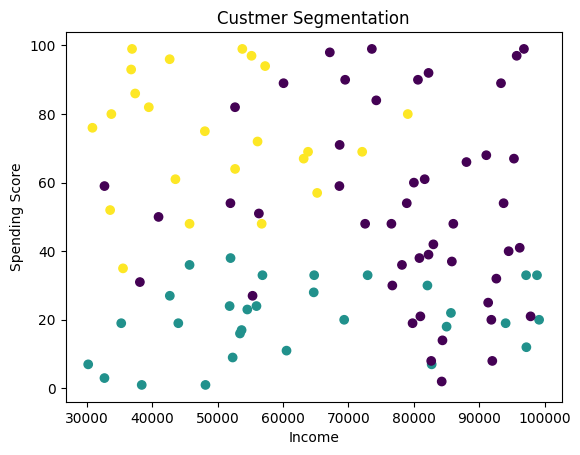

In [8]:
# visulazation
plt.scatter(data['Income'],data['SpendingScore'],c=data['Cluster'], cmap='viridis')
plt.xlabel('Income')
plt.ylabel('Spending Score')
plt.title('Custmer Segmentation')
plt.show()

In [28]:
# user input
new_customer = pd.DataFrame({'Age': [30,33,40],
                     'Income': [50000, 55000, 60000],
                     'SpendingScore': [70,73,72]
                    })


scaled_new_customer = scaler.transform(new_customer)

predicted_cluster = clustering.fit_predict(scaled_new_customer)

print(f"The new customer 1 predicted cluster is : {predicted_cluster[0]}")
print(f"The new customer 2 predicted cluster is : {predicted_cluster[1]}")
print(f"The new customer 3 predicted cluster is : {predicted_cluster[2]}")

The new customer 1 predicted cluster is : 2
The new customer 2 predicted cluster is : 1
The new customer 3 predicted cluster is : 0
